In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats
import matplotlib.colors as colors
from matplotlib import rcParams
import cmasher as cmr

path = "/Users/bethany/Library/CloudStorage/OneDrive-Personal/Projects/"
data_dir = path+ "0_Data/0_SUMS_Catalogs/"
plt.style.use(path+'0_PublishedCode/SUMS_UVPhotometricCatalog/sums.mplstyle')
rcParams["mathtext.fontset"] = 'cm'

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

def density(x,y):
    # Top cat styling for bulk of points 
    x = x[np.isfinite(x)]
    y = y[np.isfinite(y)]
    xy = np.vstack([x,y])
    z = stats.gaussian_kde(xy)(xy)
    index = z.argsort()
    x, y, z = np.array(x)[index], np.array(y)[index], np.array(z)[index]
    return x,y,z

lmc = pd.read_csv(data_dir+'CompleteCatalog/Step4/lmc_photometry.csv')
smc = pd.read_csv(data_dir+'CompleteCatalog/Step4/smc_photometry.csv')
df = pd.concat([lmc,smc])

mags = df[['uvw2_mag','uvm2_mag','uvw1_mag']].values.flatten()


errs = df[['uvw2_mag_err','uvm2_mag_err','uvw1_mag_err']].values.flatten()

errs = errs[~np.isnan(mags)]
mags = mags[~np.isnan(mags)]

n_points = 250_000
    
rand_int = np.random.randint(len(mags)+1, size=(n_points))

# Takes a long time to get the kde to run this way
run = False
if run:
    kde_err,kde_mag,kde_z = density(errs[rand_int],mags[rand_int])
    np.savetxt(f'MagVErrKDE_{n_points}.txt',(kde_err,kde_mag,kde_z))
else:
    kde_err,kde_mag,kde_z = np.loadtxt(f'MagVErrKDE_{n_points}.txt')

/var/folders/v7/3cz8p5d553b7s1dcymxc7m1hdpkh95/T/ipykernel_10879/1799376515.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


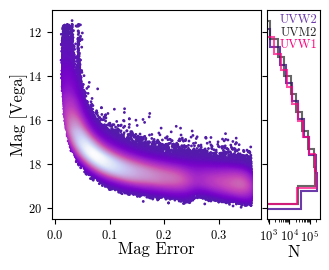

In [ ]:
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
labelfontsize = 12
tickfontsize = 9
cmap = 'rainbow'
c_min = 0.3
c_max = 0.99

trunc_cmap =  truncate_colormap(cmr.gothic, c_min,c_max)
# Start with a square Figure.
fig = plt.figure(figsize=(3.35, 3.35))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                    left=0.1, right=0.9, bottom=0.1, top=0.9,
                    wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
bx = fig.add_subplot(gs[1, 1], sharey=ax)


# Draw the scatter plot and marginals.
# no labels
bx.tick_params(axis="y", labelleft=False)

# the scatter plot:
ax.scatter(kde_err,kde_mag,c=kde_z,s=1,zorder = 0,cmap=trunc_cmap,label="")
ax.set_ylim(20.5,11)

uvw2_mags = df['uvw2_mag'].values
uvm2_mags = df['uvm2_mag'].values
uvw1_mags = df['uvw1_mag'].values
uvw2_mags = uvw2_mags[~np.isnan(uvw2_mags)]
uvm2_mags = uvm2_mags[~np.isnan(uvm2_mags)]
uvw1_mags = uvw1_mags[~np.isnan(uvw1_mags)]

cols = ['#5f4b8b','#008080','#4be8f9'] 
cols = ['#6c3baa','#262728','#FF007F'] 
bx.hist(uvw2_mags, orientation='horizontal',label='UVW2',color=cols[0],histtype='step',lw=1.5);
bx.hist(uvm2_mags, orientation='horizontal',label='UVM2',color=cols[1],histtype='step',lw=1.5,alpha=0.7);
bx.hist(uvw1_mags, orientation='horizontal',label='UVW1',color=cols[2],histtype='step',lw=1.5,alpha=0.7);
bx.set_xscale('log')

# Make ax ticks bigger
ax.tick_params(labelsize=tickfontsize)
bx.tick_params(labelsize=tickfontsize)

# Set labels
ax.set_xlabel('Mag Error',fontsize=labelfontsize)
ax.set_ylabel('Mag [Vega]',fontsize=labelfontsize)
bx.set_xlabel('N',fontsize=labelfontsize)

uvw2_errs = df['uvw2_mag_err'].values
uvm2_errs = df['uvm2_mag_err'].values
uvw1_errs = df['uvw1_mag_err'].values
uvw2_errs = uvw2_errs[~np.isnan(uvw2_errs)]
uvm2_errs = uvm2_errs[~np.isnan(uvm2_errs)]
uvw1_errs = uvw1_errs[~np.isnan(uvw1_errs)]


spacing = 0.06
ytext = 0.98
xtext = 0.95
bx.text(xtext, ytext , 'UVW2', verticalalignment='top', horizontalalignment='right',
        transform=bx.transAxes, color=cols[0], fontsize=tickfontsize,weight='bold')
bx.text(xtext, ytext-spacing, 'UVM2', verticalalignment='top', horizontalalignment='right',
        transform=bx.transAxes, color=cols[1], fontsize=tickfontsize,weight='bold')
bx.text(xtext, ytext-(2*spacing), 'UVW1', verticalalignment='top', horizontalalignment='right',
        transform=bx.transAxes, color=cols[2], fontsize=tickfontsize,weight='bold')

plt.gcf().patch.set_facecolor('white')
plt.tight_layout()
plt.savefig('MagVErrKDE.png',dpi=300,bbox_inches='tight')